<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Unsupervised%20Learning/DBSCAN%20Clustering%20Algorithm/DBSCAN_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [3]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

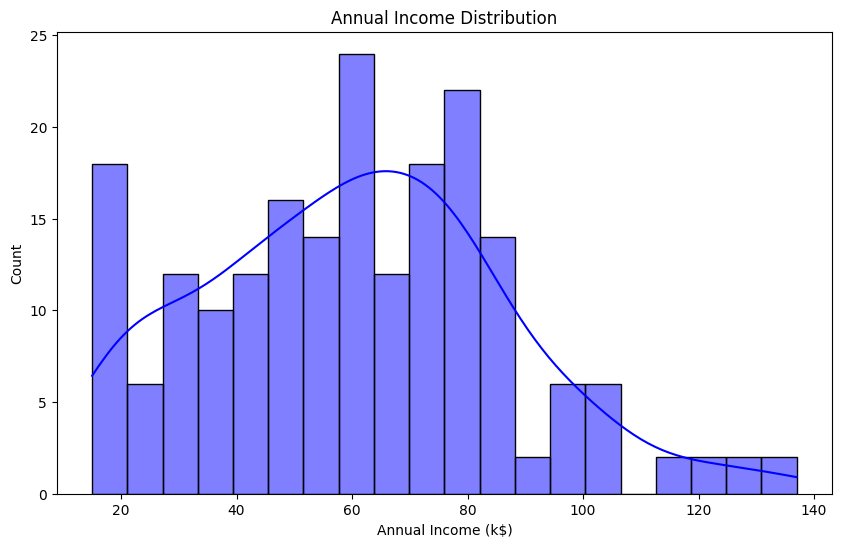

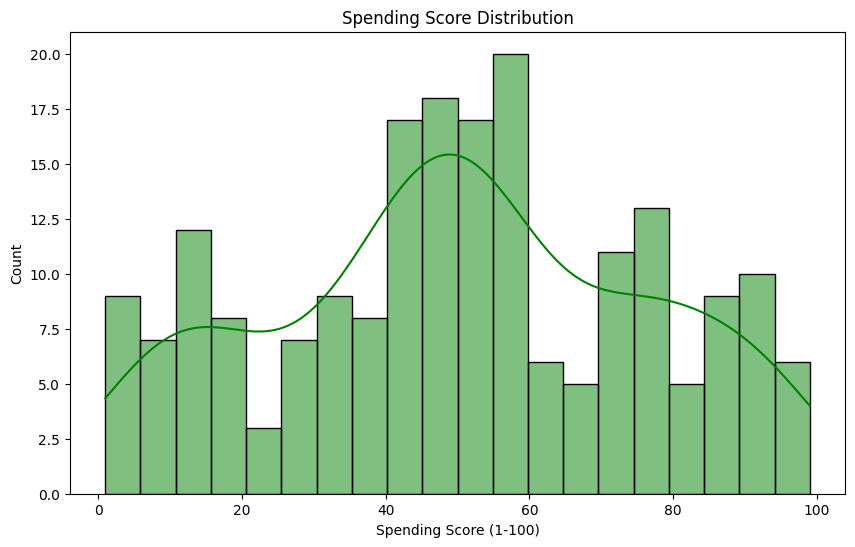

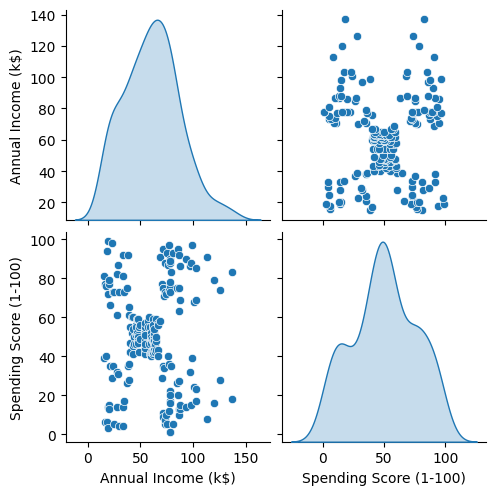

In [4]:
# Summary of the dataset
print(data.info())
print(data.describe())

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], kde=True, color='blue', bins=20)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True, color='green', bins=20)
plt.title("Spending Score Distribution")
plt.show()

# Pairplot for feature relationships
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()


In [6]:
# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.34, min_samples=5)  # Adjust eps and min_samples based on your data
labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
data['Cluster'] = labels

# Print the unique clusters
print(f"Unique clusters identified: {set(labels)}")


Unique clusters identified: {0, 1, 2, 3, 4, 5, -1}


In [54]:
# Silhouette Score (ignoring noise points)
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    print(f"Silhouette Score: {silhouette_avg:.2f}")
else:
    print("Silhouette Score cannot be calculated with only one cluster.")


Silhouette Score: 0.56


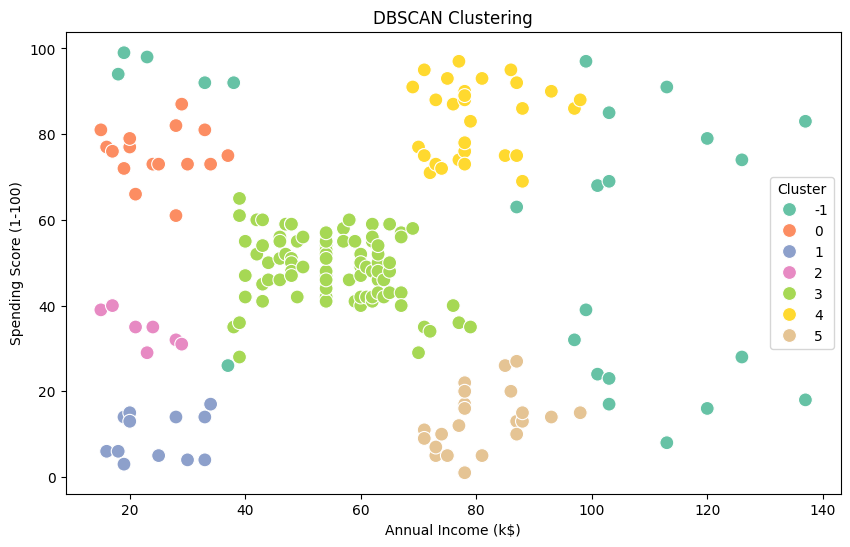

In [55]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=data,
    palette='Set2',
    s=100
)
plt.title("DBSCAN Clustering")
plt.legend(title="Cluster")
plt.show()


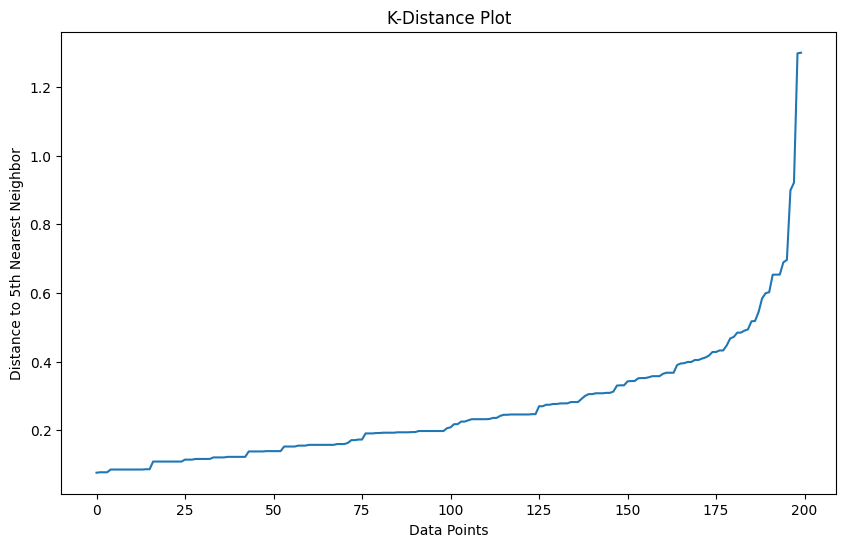

In [56]:
from sklearn.neighbors import NearestNeighbors

# Find nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot the distances
distances = np.sort(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("K-Distance Plot")
plt.xlabel("Data Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.show()
